<a href="https://colab.research.google.com/github/aleszcz/Aleks_portfolio/blob/main/TextBlob_and_World_Count_of_Romeo_and_Juliet_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LLM Class 1
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use ('fivethirtyeight')
%matplotlib inline


In [ ]:
import pandas as pd
import io
import csv
import re

file_path = '/content/WELFake_Dataset.csv'



In [ ]:
import pandas as pd

file_path = '/content/WELFake_Dataset.csv'

try:
    df = pd.read_csv(file_path, error_bad_lines=False)
    print(df)
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")


Error reading CSV: Error tokenizing data. C error: EOF inside string starting at row 542


<ipython-input-63-ea3f27de007f>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)


In [ ]:
import pandas as pd

file_path = '/content/WELFake_Dataset.csv'

try:
    df = pd.read_csv(file_path, on_bad_lines='skip')
    print(df)
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")


Error reading CSV: Error tokenizing data. C error: EOF inside string starting at row 542


In [ ]:
import pandas as pd

file_path = '/content/WELFake_Dataset.csv'

# Read the CSV file excluding row 542
try:
    df = pd.read_csv(file_path, skiprows=[542])
    print(df)
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")


     Unnamed: 0                                              title  \
0             0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1             1                                                NaN   
2             2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3             3  Bobby Jindal, raised Hindu, uses story of Chri...   
4             4  SATAN 2: Russia unvelis an image of its terrif...   
..          ...                                                ...   
536         536  Stockholm Attacker Was ’Rejected Asylum Seeker...   
537         537  Actor Mark Ruffalo Joins Activists In ND To Pr...   
538         538  Mexico expresses ire over U.S. migration polic...   
539         539  Zimbabwe court grants bail to U.S. citizen cha...   
540         540  2 Reminders to Ignore the "Trump is Doomed" Polls   

                                                  text  label  
0    No comment is expected from Barack Obama Membe...      1  
1       Did they post their vot

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('worldfloras.csv')

# Remove rows with NaN values
df_cleaned = df.dropna()

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head())


       Country  Latitude    Area  Population   Flora  Endemism Continent
1  Afghanistan      30.0   636.0      14.300  3000.0     0.270      Asia
3      Albania      42.0    29.0       3.000  3200.0     0.008    Europe
4      Algeria      35.0  2382.0      21.300  3139.0     0.080  N.Africa
5      Andorra      42.0     0.5       0.034  1000.0     0.000    Europe
6       Angola      25.0  1247.0       8.500  5000.0     0.250    Africa


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('worldfloras.csv')

# Drop rows with NaN values in the 'Country' column
df_cleaned = df.dropna(subset=['Country'])

# Filter rows where the 'Country' column starts with 'D' or 'E'
filtered_countries = df_cleaned[df_cleaned['Country'].str.startswith(('D', 'E'))]

# Display the 'Country' names
print(filtered_countries['Country'])


40               Denmark
41    Dominican Republic
42               Ecuador
43                 Egypt
44           El Salvador
45              Ethiopia
Name: Country, dtype: object


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('worldfloras.csv')

# Drop rows with NaN values in the 'Country' column
df_cleaned = df.dropna(subset=['Country'])

# Filter rows where the 'Country' column starts with 'New'
filtered_countries = df_cleaned[df_cleaned['Country'].str.startswith('New')]

# Display the 'Country' names
print(filtered_countries['Country'])


102    New Caledonia
103      New Zealand
Name: Country, dtype: object


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('worldfloras.csv')

# Drop rows with NaN values in the 'Country' column
df_cleaned = df.dropna(subset=['Country'])

# Filter rows where the 'Country' column has 'y' as the second character
filtered_countries = df_cleaned[df_cleaned['Country'].str[1] == 'y']

# Display the 'Country' names
print(filtered_countries['Country'])


38     Cyprus
140     Syria
Name: Country, dtype: object


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('worldfloras.csv')

# Drop rows with NaN values in the 'Country' column
df_cleaned = df.dropna(subset=['Country'])

# Filter rows where the 'Country' column has 'y' as the sixth character
filtered_countries = df_cleaned[df_cleaned['Country'].str[5] == 'y']

# Display the 'Country' names
print(filtered_countries['Country'])


107    Norway
126    Sicily
148    Turkey
Name: Country, dtype: object


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('worldfloras.csv')

# Drop rows with NaN values in the 'Country' column
df_cleaned = df.dropna(subset=['Country'])

# Filter rows where the 'Country' column has 'c' as the fourth character
filtered_countries = df_cleaned[df_cleaned['Country'].str[3] == 'c']

# Display the 'Country' names
print(filtered_countries['Country'])


39     Czechoslovakia
86      Liechtenstein
125        Seychelles
Name: Country, dtype: object


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('worldfloras.csv')

# Create a boolean mask for rows where the 'Country' column has 'c' as the fourth character
boolean_mask = df['Country'].str[3] == 'c'

# Apply the boolean mask to filter rows
filtered_countries = df[boolean_mask]

# Display the 'Country' names
print(filtered_countries['Country'])


39     Czechoslovakia
86      Liechtenstein
125        Seychelles
Name: Country, dtype: object


In [ ]:
#NLP TextBlob homework

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punk')
nltk.download('brown')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading punk: Package 'punk' not found in index
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# REad the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()
blobTotal = TextBlob(textTotal)
print("---------------------------------")
blobTotal = TextBlob(textTotal)
###############################
numChars = 1000
text1000 = textTotal [0:numChars+1]
blob1000 = TextBlob (text1000)


print(text1000)
print("-------------------------")
print(blob1000)
print("-------------------------")


---------------------------------

Project Gutenberg’s Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you’ll
have to check the laws of the country where you are located before using
this ebook.



Title: Romeo and Juliet

Author: William Shakespeare

Release Date: November, 1998 [Etext #1513]
Last Updated: January 30, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***



This etext was produced by the PG Shakespeare Team,
a team of about twenty Project Gutenberg volunteers.


THE TRAGEDY OF ROMEO AND JULIET



by William Shakespeare






Contents

THE PROLOGUE.

ACT I
Scene I. A p

In [ ]:
from textblob import TextBlob
from collections import Counter

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object
blobTotal = TextBlob(textTotal)

# Count the frequency of each word (including stop words)
word_frequency = Counter(blobTotal.words.lower())

# Print the top-10 words with their frequencies
top_10_words = word_frequency.most_common(10)
for word, frequency in top_10_words:
    print(f"Word: {word}, Frequency: {frequency}")

# Optionally, you can print the frequency of all words
print("\nWord Frequencies:")
for word, frequency in word_frequency.items():
    print(f"Word: {word}, Frequency: {frequency}")


Word: the, Frequency: 876
Word: ’, Frequency: 869
Word: and, Frequency: 808
Word: i, Frequency: 655
Word: to, Frequency: 626
Word: a, Frequency: 542
Word: of, Frequency: 519
Word: in, Frequency: 395
Word: is, Frequency: 372
Word: that, Frequency: 369

Word Frequencies:
Word: project, Frequency: 90
Word: gutenberg, Frequency: 33
Word: ’, Frequency: 869
Word: s, Frequency: 311
Word: romeo, Frequency: 320
Word: and, Frequency: 808
Word: juliet, Frequency: 195
Word: by, Frequency: 144
Word: william, Frequency: 4
Word: shakespeare, Frequency: 6
Word: this, Frequency: 271
Word: ebook, Frequency: 11
Word: is, Frequency: 372
Word: for, Frequency: 249
Word: the, Frequency: 876
Word: use, Frequency: 25
Word: of, Frequency: 519
Word: anyone, Frequency: 5
Word: anywhere, Frequency: 3
Word: in, Frequency: 395
Word: united, Frequency: 15
Word: states, Frequency: 19
Word: most, Frequency: 21
Word: other, Frequency: 33
Word: parts, Frequency: 4
Word: world, Frequency: 19
Word: at, Frequency: 83
Word: 

In [ ]:
from textblob import TextBlob
import nltk

# Download the punkt tokenizer data
nltk.download('punkt')

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()
blobTotal = TextBlob(textTotal)
print("---------------------------------")
blobTotal = TextBlob(textTotal)
###############################

numChars = 1000
text1000 = textTotal[0:numChars+1]
blob1000 = TextBlob(text1000)

# Count the number of words
word_count_total = len(blobTotal.words)
word_count_1000 = len(blob1000.words)



print("Number of words in the entire text:", word_count_total)
print("Number of words in the first 1000 characters:", word_count_1000)

print(text1000)
print("-------------------------")
print(blob1000)
print("-------------------------")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


---------------------------------
Number of words in the entire text: 30796
Number of words in the first 1000 characters: 167

Project Gutenberg’s Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you’ll
have to check the laws of the country where you are located before using
this ebook.



Title: Romeo and Juliet

Author: William Shakespeare

Release Date: November, 1998 [Etext #1513]
Last Updated: January 30, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***



This etext was produced by the PG Shakespeare Team,
a team of about twenty Project Gutenberg volunteers.


THE TRAGEDY OF 

In [ ]:
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords

# Download the NLTK stop words
nltk.download('stopwords')

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object
blobTotal = TextBlob(textTotal)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Print the stop words
print("Stop Words:")
print(stop_words,10)

# Remove stop words from the text
filtered_words = [word for word in blobTotal.words.lower() if word not in stop_words]

# Count the unique words
unique_word_count = len(set(filtered_words))

print("Number of unique words in the entire text after removing stop words:", unique_word_count)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stop Words:
{'their', 'whom', 'her', "don't", "should've", "needn't", 'itself', 'after', 'mightn', 'won', 'hadn', 'should', 'against', 'wasn', 'no', 'if', 'it', 'nor', 'has', 'my', 'theirs', 's', 're', 'don', 'there', "weren't", 'i', "hadn't", 'few', 'when', 'we', 'very', 'who', 'more', "couldn't", 'o', "you'll", 'but', 'haven', 'up', 'under', 'yours', 'themselves', 'now', 'weren', 'some', 'these', "won't", 't', 'own', 'below', 'd', "isn't", 'same', 'me', 'shan', "wasn't", 've', 'through', 'having', 'shouldn', 'to', 'was', 'he', 'hers', "shouldn't", 'were', 'which', 'other', 'ma', "it's", 'did', 'further', 'mustn', 'had', 'than', 'ain', 'do', 'been', 'by', 'is', "mustn't", 'your', 'him', 'you', 'about', 'its', 'needn', 'once', 'will', 'while', 'why', 'with', 'yourselves', "hasn't", 'himself', 'y', 'on', 'hasn', 'for', 'during', 'ours', 'both', "aren't", 'down', "mightn't", 'what', 'be', 'so', 'not', "you're", 'have', "shan't", 'of', 'all', 'being', 'an', 'aren', 'the', 'them', "didn't"

In [ ]:
#extra addition to the homework
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords

# Download the NLTK stop words
nltk.download('stopwords')

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object
blobTotal = TextBlob(textTotal)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Print the stop words
print("Stop Words:")
print(stop_words)

# Remove stop words from the text
filtered_words = [word for word in blobTotal.words.lower() if word not in stop_words]

# Count the total number of words
total_word_count = len(blobTotal.words)

# Count the unique words (excluding stop words)
unique_word_count = len(set(filtered_words))

print("Total number of words in the entire text:", total_word_count)
print("Number of unique words in the entire text after removing stop words:", unique_word_count)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stop Words:
{'their', 'whom', 'her', "don't", "should've", "needn't", 'itself', 'after', 'mightn', 'won', 'hadn', 'should', 'against', 'wasn', 'no', 'if', 'it', 'nor', 'has', 'my', 'theirs', 's', 're', 'don', 'there', "weren't", 'i', "hadn't", 'few', 'when', 'we', 'very', 'who', 'more', "couldn't", 'o', "you'll", 'but', 'haven', 'up', 'under', 'yours', 'themselves', 'now', 'weren', 'some', 'these', "won't", 't', 'own', 'below', 'd', "isn't", 'same', 'me', 'shan', "wasn't", 've', 'through', 'having', 'shouldn', 'to', 'was', 'he', 'hers', "shouldn't", 'were', 'which', 'other', 'ma', "it's", 'did', 'further', 'mustn', 'had', 'than', 'ain', 'do', 'been', 'by', 'is', "mustn't", 'your', 'him', 'you', 'about', 'its', 'needn', 'once', 'will', 'while', 'why', 'with', 'yourselves', "hasn't", 'himself', 'y', 'on', 'hasn', 'for', 'during', 'ours', 'both', "aren't", 'down', "mightn't", 'what', 'be', 'so', 'not', "you're", 'have', "shan't", 'of', 'all', 'being', 'an', 'aren', 'the', 'them', "didn't"

In [ ]:
# Create a TextBlob object
blobTotal = TextBlob(textTotal)

# Get noun phrases from the entire text
noun_phrases = blobTotal.noun_phrases

# Count the number of noun phrases
num_noun_phrases = len(noun_phrases)

print("Number of noun phrases in the entire text:", num_noun_phrases)

Number of noun phrases in the entire text: 5039


In [ ]:
from textblob import TextBlob

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object
blobTotal = TextBlob(textTotal)

# Get noun phrases from the entire text
noun_phrases = blobTotal.noun_phrases

# Display noun phrases with three phrases per line
for i in range(0, len(noun_phrases), 3):
    phrases_to_display = noun_phrases[i:i + 3]
    print(', '.join(phrases_to_display))

# Optionally, you can print the total number of noun phrases
print("\nTotal number of noun phrases:", len(noun_phrases))


project gutenberg, ’ s, romeo
juliet, william shakespeare, restrictions whatsoever
project gutenberg license, ’ ll, title
romeo, juliet author, william shakespeare release date
november, etext, updated
january, language, english character
utf-8, * * *, start of this project gutenberg ebook romeo and juliet
* * *, pg shakespeare team, project gutenberg
the tragedy of romeo and juliet, william shakespeare contents the prologue, act
scene, public place, scene ii
scene iii, capulet, ’ s house
scene iv, scene v., a hall
capulet, ’ s house, act ii chorus
scene, open place, capulet
’ s garden, scene ii, capulet
’ s garden, scene iii, friar lawrence
’ s, cell, scene iv
scene v. capulet, ’ s garden, scene vi
friar lawrence, ’ s, cell
act iii scene, public place, scene ii
capulet, ’ s house, scene iii
friar lawrence, ’ s cell, scene iv
capulet, ’ s house, scene v.
open gallery, juliet, ’ s chamber
act iv scene i. friar lawrence, ’ s, cell
scene ii, capulet, ’ s house
scene iii, juliet, ’ s chamb

In [ ]:
from textblob import TextBlob
from collections import Counter

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object
blobTotal = TextBlob(textTotal)

# Get noun phrases from the entire text (including stop words)
noun_phrases = blobTotal.noun_phrases

# Count the frequency of each noun phrase
noun_phrase_frequency = Counter(noun_phrases)

# Print the top-10 noun phrases with their frequencies
top_10_noun_phrases = noun_phrase_frequency.most_common(10)
for phrase, frequency in top_10_noun_phrases:
    print(f"Noun Phrase: {phrase}, Frequency: {frequency}")

# Optionally, you can print the frequency of all noun phrases
print("\nNoun Phrase Frequencies:")
for phrase, frequency in noun_phrase_frequency.items():
    print(f"Noun Phrase: {phrase}, Frequency: {frequency}")


Noun Phrase: romeo, Frequency: 297
Noun Phrase: juliet, Frequency: 177
Noun Phrase: nurse, Frequency: 132
Noun Phrase: capulet, Frequency: 106
Noun Phrase: ’ s, Frequency: 98
Noun Phrase: mercutio, Frequency: 86
Noun Phrase: tybalt, Frequency: 75
Noun Phrase: benvolio, Frequency: 72
Noun Phrase: friar lawrence, Frequency: 69
Noun Phrase: ’ ll, Frequency: 68

Noun Phrase Frequencies:
Noun Phrase: project gutenberg, Frequency: 12
Noun Phrase: ’ s, Frequency: 98
Noun Phrase: romeo, Frequency: 297
Noun Phrase: juliet, Frequency: 177
Noun Phrase: william shakespeare, Frequency: 2
Noun Phrase: restrictions whatsoever, Frequency: 2
Noun Phrase: project gutenberg license, Frequency: 2
Noun Phrase: ’ ll, Frequency: 68
Noun Phrase: title, Frequency: 1
Noun Phrase: juliet author, Frequency: 1
Noun Phrase: william shakespeare release date, Frequency: 1
Noun Phrase: november, Frequency: 1
Noun Phrase: etext, Frequency: 1
Noun Phrase: updated, Frequency: 2
Noun Phrase: january, Frequency: 1
Noun Phr

In [ ]:
#searching words with a specific string
for word in blobTotal.words:
  if 'WA' in word:
    print(word)


WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WARRANTY
WARRANTY
WARRANTIES
WARRANTIES


In [ ]:
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter

# Download the NLTK stop words
nltk.download('stopwords')

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object
blobTotal = TextBlob(textTotal)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the text
filtered_words = [word for word in blobTotal.words.lower() if word not in stop_words]

# Count the frequency of each non-stop word
word_frequency = Counter(filtered_words)

# Print the top-10 non-stop words with their frequencies
top_10_words = word_frequency.most_common(10)
for word, frequency in top_10_words:
    print(f"Word: {word}, Frequency: {frequency}")

# Optionally, you can print the frequency of all non-stop words
print("\nWord Frequencies (excluding stop words):")
for word, frequency in word_frequency.items():
    print(f"Word: {word}, Frequency: {frequency}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Word: ’, Frequency: 869
Word: romeo, Frequency: 320
Word: thou, Frequency: 278
Word: juliet, Frequency: 195
Word: thy, Frequency: 170
Word: capulet, Frequency: 163
Word: nurse, Frequency: 149
Word: love, Frequency: 148
Word: thee, Frequency: 138
Word: lady, Frequency: 117

Word Frequencies (excluding stop words):
Word: project, Frequency: 90
Word: gutenberg, Frequency: 33
Word: ’, Frequency: 869
Word: romeo, Frequency: 320
Word: juliet, Frequency: 195
Word: william, Frequency: 4
Word: shakespeare, Frequency: 6
Word: ebook, Frequency: 11
Word: use, Frequency: 25
Word: anyone, Frequency: 5
Word: anywhere, Frequency: 3
Word: united, Frequency: 15
Word: states, Frequency: 19
Word: parts, Frequency: 4
Word: world, Frequency: 19
Word: cost, Frequency: 4
Word: almost, Frequency: 5
Word: restrictions, Frequency: 2
Word: whatsoever, Frequency: 2
Word: may, Frequency: 63
Word: copy, Frequency: 12
Word: give, Frequency: 51
Word: away, Frequency: 26
Word: re-use, Frequency: 2
Word: terms, Frequenc

In [ ]:
import pandas as pd

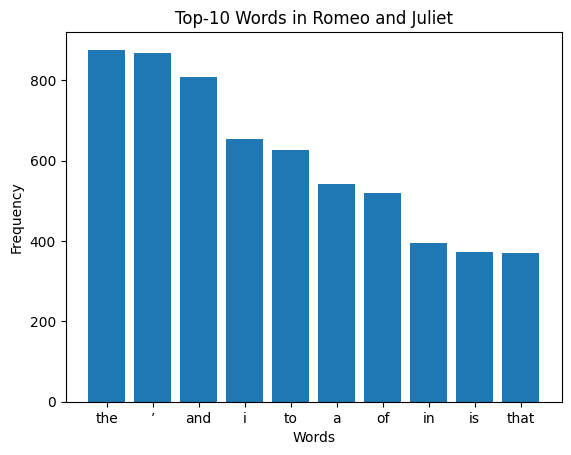

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object
blobTotal = TextBlob(textTotal)

# Count the frequency of each word (including stop words)
word_frequency = Counter(blobTotal.words.lower())

# Get the top-10 words and their frequencies
top_10_words = word_frequency.most_common(10)

# Extract words and frequencies for plotting
words, frequencies = zip(*top_10_words)

# Create a bar plot
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top-10 Words in Romeo and Juliet')
plt.show()


In [ ]:
from textblob import TextBlob

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Extract the first 1,000 characters
numChars = 1000
text1000 = textTotal[0:numChars+1]

# Create a TextBlob object for the first 1,000 characters
blob1000 = TextBlob(text1000)

# Get noun phrases from the first 1,000 characters
noun_phrases_1000 = blob1000.noun_phrases

# Display noun phrases with three phrases per line
for i in range(0, len(noun_phrases_1000), 3):
    phrases_to_display = noun_phrases_1000[i:i + 3]
    print(', '.join(phrases_to_display))

# Optionally, you can print the total number of noun phrases in the first 1,000 characters
print("\nTotal number of noun phrases in the first 1,000 characters:", len(noun_phrases_1000))


project gutenberg, ’ s, romeo
juliet, william shakespeare, restrictions whatsoever
project gutenberg license, ’ ll, title
romeo, juliet author, william shakespeare release date
november, etext, updated
january, language, english character
utf-8, * * *, start of this project gutenberg ebook romeo and juliet
* * *, pg shakespeare team, project gutenberg
the tragedy of romeo and juliet, william shakespeare contents the prologue, act
scene, public place, scene ii
sc

Total number of noun phrases in the first 1,000 characters: 31


In [ ]:
from textblob import TextBlob

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object
blobTotal = TextBlob(textTotal)

# Get noun phrases from the entire text
noun_phrases = blobTotal.noun_phrases

# Display noun phrases with three phrases per line
for i in range(0, len(noun_phrases), 3):
    phrases_to_display = noun_phrases[i:i + 3]
    print(', '.join(phrases_to_display))

# Optionally, you can print the total number of noun phrases
print("\nTotal number of noun phrases:", len(noun_phrases))

project gutenberg, ’ s, romeo
juliet, william shakespeare, restrictions whatsoever
project gutenberg license, ’ ll, title
romeo, juliet author, william shakespeare release date
november, etext, updated
january, language, english character
utf-8, * * *, start of this project gutenberg ebook romeo and juliet
* * *, pg shakespeare team, project gutenberg
the tragedy of romeo and juliet, william shakespeare contents the prologue, act
scene, public place, scene ii
scene iii, capulet, ’ s house
scene iv, scene v., a hall
capulet, ’ s house, act ii chorus
scene, open place, capulet
’ s garden, scene ii, capulet
’ s garden, scene iii, friar lawrence
’ s, cell, scene iv
scene v. capulet, ’ s garden, scene vi
friar lawrence, ’ s, cell
act iii scene, public place, scene ii
capulet, ’ s house, scene iii
friar lawrence, ’ s cell, scene iv
capulet, ’ s house, scene v.
open gallery, juliet, ’ s chamber
act iv scene i. friar lawrence, ’ s, cell
scene ii, capulet, ’ s house
scene iii, juliet, ’ s chamb

In [ ]:
from textblob import TextBlob

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object for the entire text
blobTotal = TextBlob(textTotal)

# Get noun phrases from the entire text
noun_phrases_total = blobTotal.noun_phrases

# Count the number of noun phrases
num_noun_phrases_total = len(noun_phrases_total)

print("Number of noun phrases in the entire text:", num_noun_phrases_total)


Number of noun phrases in the entire text: 5039


In [ ]:
from textblob import TextBlob
from collections import Counter

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object for the entire text
blobTotal = TextBlob(textTotal)

# Get noun phrases from the entire text
noun_phrases_total = blobTotal.noun_phrases

# Count the frequency of each noun phrase
noun_phrase_frequency_total = Counter(noun_phrases_total)

# Sort the noun phrases based on frequency in descending order
sorted_noun_phrases = sorted(noun_phrase_frequency_total.items(), key=lambda x: x[1], reverse=True)

# Print the top-10 noun phrases with their frequencies
print("Top-10 Noun Phrases and Frequencies:")
for phrase, frequency in sorted_noun_phrases[:10]:
    print(f"Noun Phrase: {phrase}, Frequency: {frequency}")


Top-10 Noun Phrases and Frequencies:
Noun Phrase: romeo, Frequency: 297
Noun Phrase: juliet, Frequency: 177
Noun Phrase: nurse, Frequency: 132
Noun Phrase: capulet, Frequency: 106
Noun Phrase: ’ s, Frequency: 98
Noun Phrase: mercutio, Frequency: 86
Noun Phrase: tybalt, Frequency: 75
Noun Phrase: benvolio, Frequency: 72
Noun Phrase: friar lawrence, Frequency: 69
Noun Phrase: ’ ll, Frequency: 68


In [ ]:
from textblob import TextBlob
from collections import Counter

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object for the entire text
blobTotal = TextBlob(textTotal)

# Get noun phrases from the entire text
noun_phrases_total = blobTotal.noun_phrases

# Count the frequency of each noun phrase
noun_phrase_frequency_total = Counter(noun_phrases_total)

# Sort the noun phrases based on frequency in descending order
sorted_noun_phrases = sorted(noun_phrase_frequency_total.items(), key=lambda x: x[1], reverse=True)

# Save the top-10 noun phrases and their frequencies to a text file
output_file_path = '/content/top_noun_phrases.txt'  # Adjust the path as needed

with open(output_file_path, 'w') as output_file:
    output_file.write("Top-10 Noun Phrases and Frequencies:\n")
    for phrase, frequency in sorted_noun_phrases[:10]:
        output_file.write(f"Noun Phrase: {phrase}, Frequency: {frequency}\n")

print(f"Top-10 noun phrases saved to: {output_file_path}")


Top-10 noun phrases saved to: /content/top_noun_phrases.txt


In [ ]:
from textblob import TextBlob
from collections import Counter

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object for the entire text
blobTotal = TextBlob(textTotal)

# Get noun phrases from the entire text
noun_phrases_total = blobTotal.noun_phrases

# Count the frequency of each noun phrase
noun_phrase_frequency_total = Counter(noun_phrases_total)

# Capitalize the first letter of each word in the noun phrases
capitalized_noun_phrases = [phrase.title() for phrase in noun_phrase_frequency_total.keys()]

# Zip the capitalized noun phrases with their frequencies
capitalized_noun_phrases_with_freq = zip(capitalized_noun_phrases, noun_phrase_frequency_total.values())

# Sort the capitalized noun phrases based on frequency in descending order
sorted_noun_phrases = sorted(capitalized_noun_phrases_with_freq, key=lambda x: x[1], reverse=True)

# Print the top-10 noun phrases with their frequencies
print("Top-10 Noun Phrases and Frequencies:")
for phrase, frequency in sorted_noun_phrases[:10]:
    print(f"Noun Phrase: {phrase}, Frequency: {frequency}")


Top-10 Noun Phrases and Frequencies:
Noun Phrase: Romeo, Frequency: 297
Noun Phrase: Juliet, Frequency: 177
Noun Phrase: Nurse, Frequency: 132
Noun Phrase: Capulet, Frequency: 106
Noun Phrase: ’ S, Frequency: 98
Noun Phrase: Mercutio, Frequency: 86
Noun Phrase: Tybalt, Frequency: 75
Noun Phrase: Benvolio, Frequency: 72
Noun Phrase: Friar Lawrence, Frequency: 69
Noun Phrase: ’ Ll, Frequency: 68


In [ ]:
from google.colab import files
uploaded = files.upload()
file_name= list (uploaded.keys())[0]
print()
print('The Mask File Name= :' +str(file_name))


Saving mask_heart.png to mask_heart (3).png

The Mask File Name= :mask_heart (3).png


In [ ]:
!pip install wordcloud

In [ ]:
import imageio.v2 as imageio
from wordcloud import WordCloud

mask_image = imageio.imread(str('/content/mask_heart (3).png'))

wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')
wordcloudImage = wordcloud.generate(textTotal)


<class 'wordcloud.wordcloud.WordCloud'>


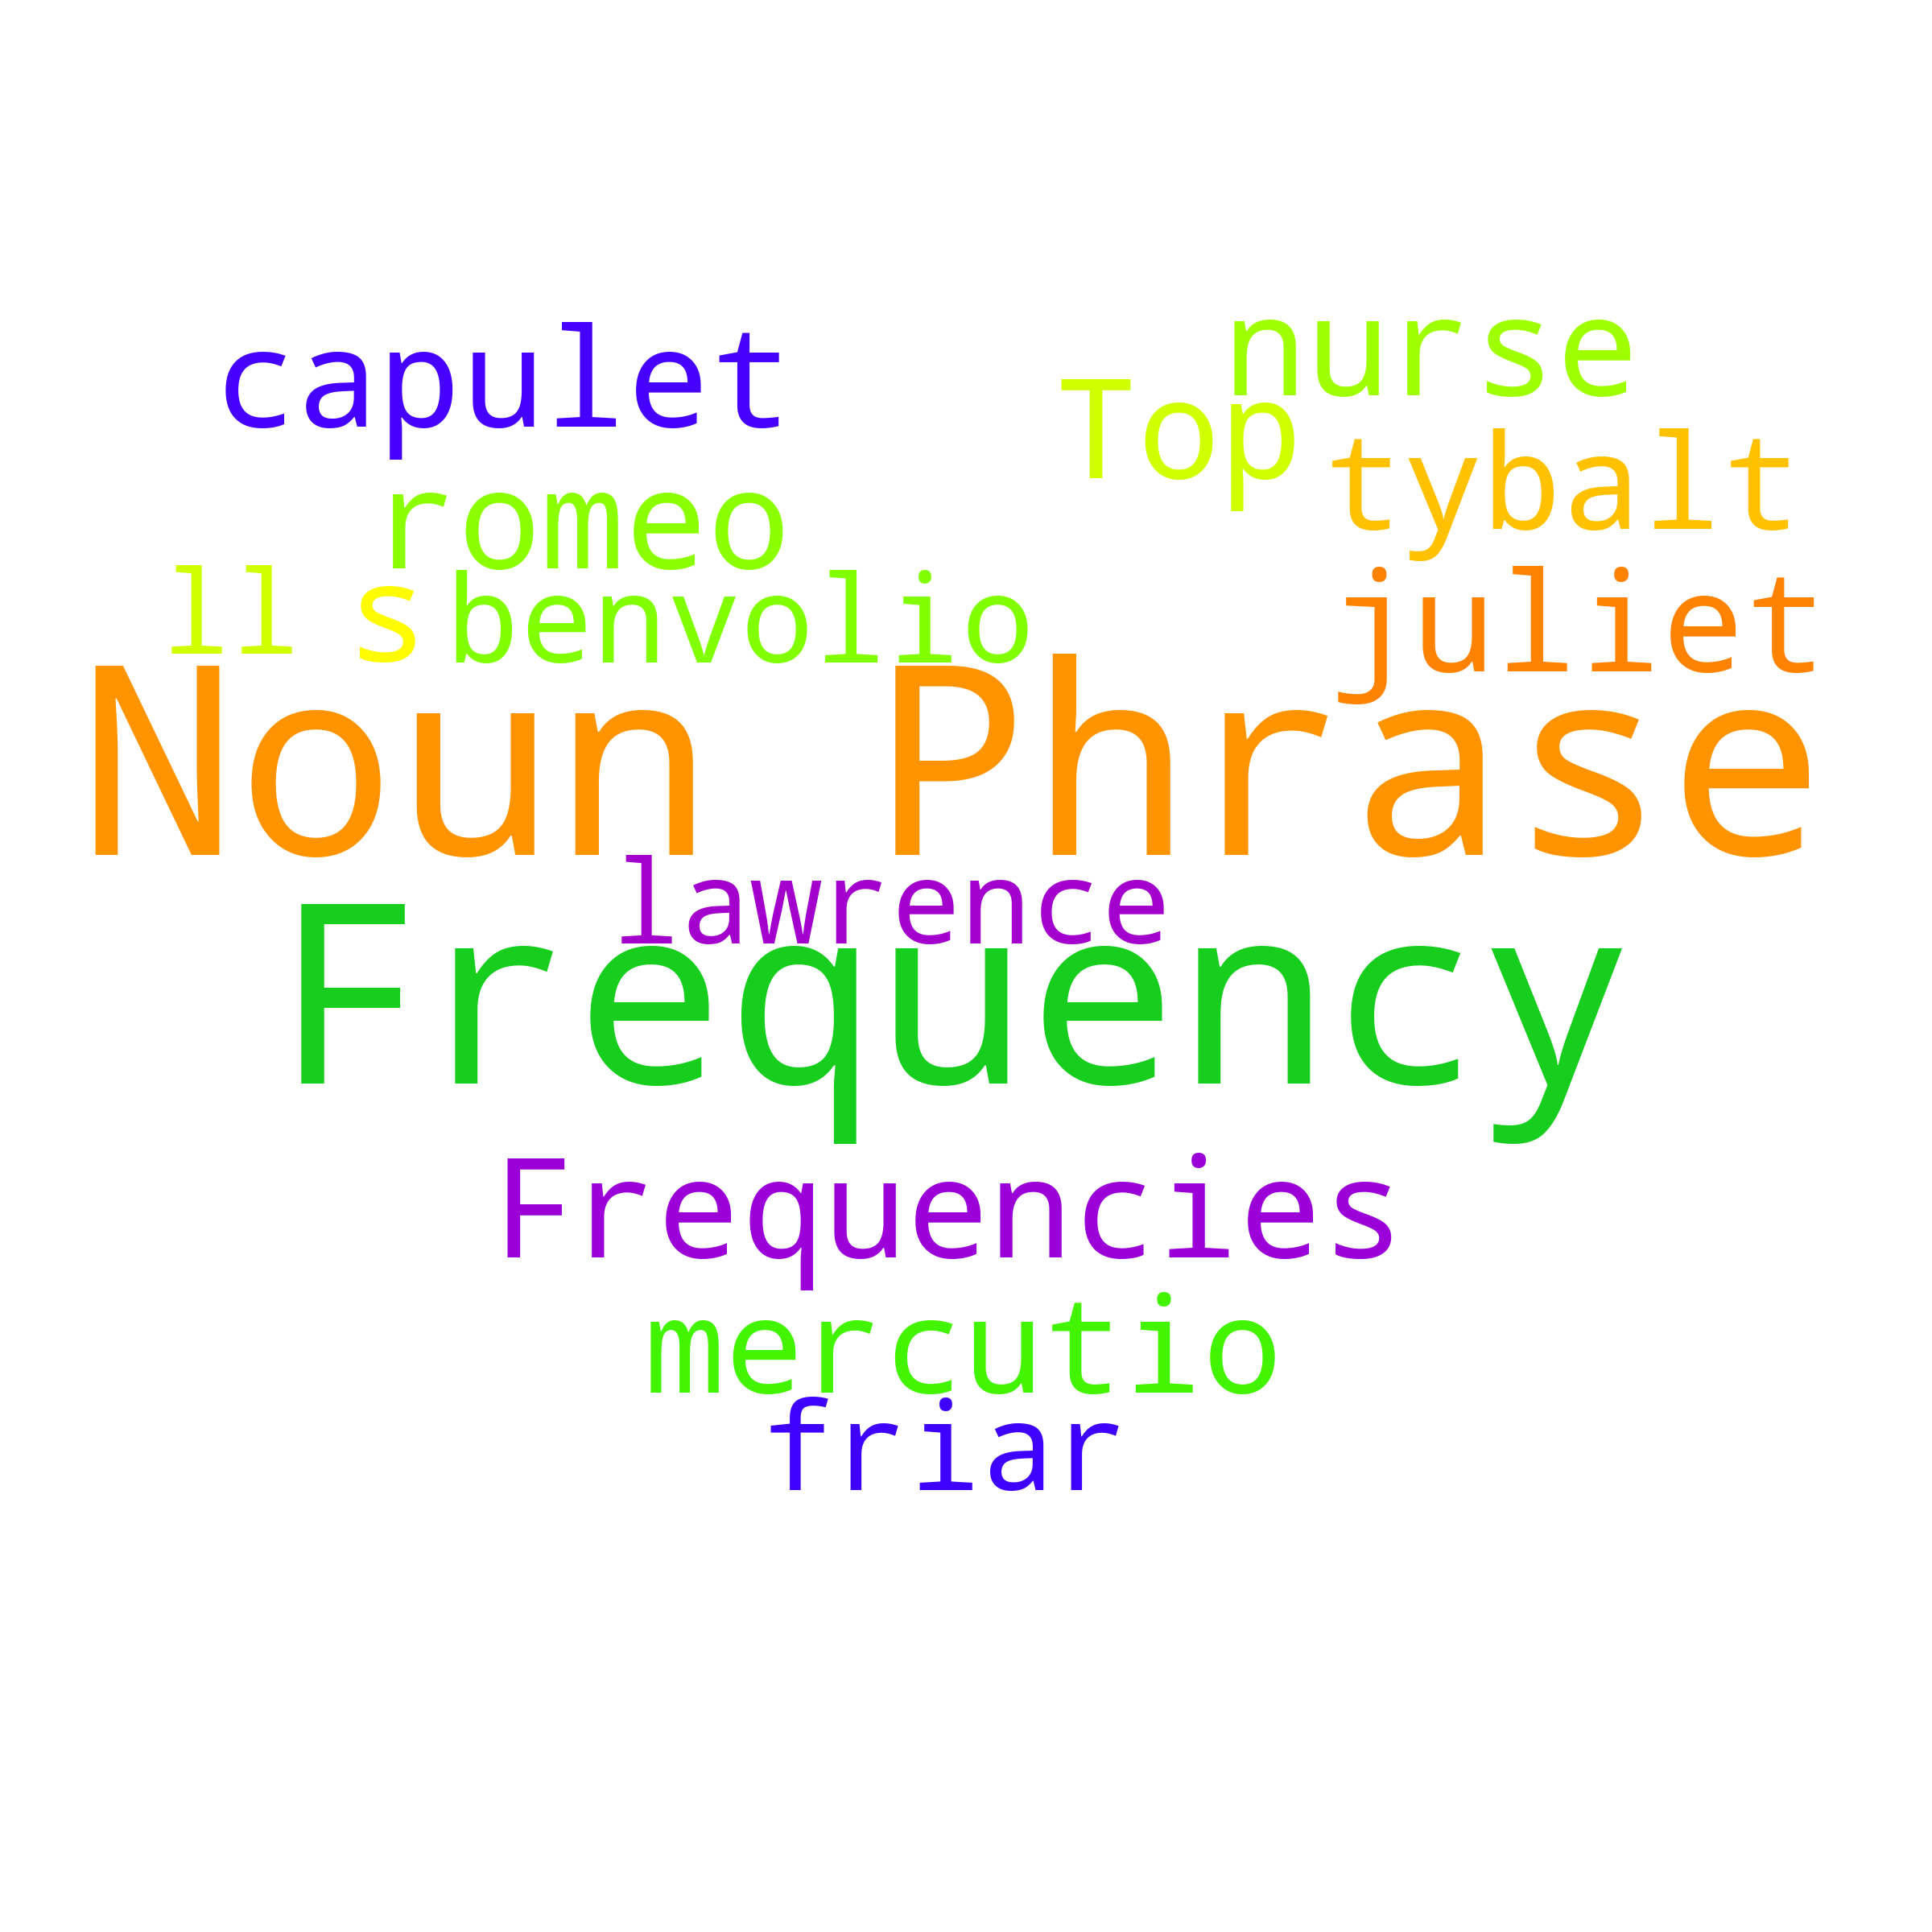

In [ ]:
import imageio.v2 as imageio
from wordcloud import WordCloud

mask_image = imageio.imread(str('/content/mask_heart (3).png'))

wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')
wordcloud_image = wordcloud.generate(textTotal)
print(type(wordcloud_image))
worldcloud_file = wordcloud_image.to_file('Hamlet.png')
wordcloud_image.to_image()


In [ ]:
import imageio.v2 as imageio
from wordcloud import WordCloud


mask_image = imageio.imread(str('/content/mask_heart (3).png'))

from worldcloud import WordCloud
worldcloud = WordCloud(colormap = 'prism', mask=mask_image, background_color ='white')
worlcloudImage= worldcloud.generate(textTotal)

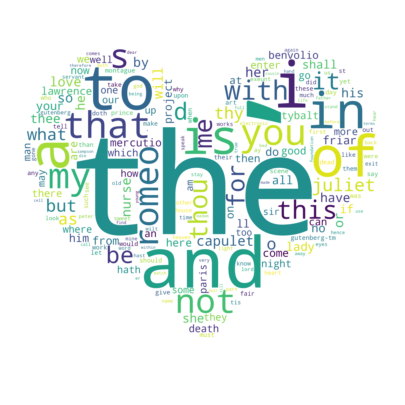

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from textblob import TextBlob

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object for the entire text
blobTotal = TextBlob(textTotal)

# Generate a word cloud using a heart-shaped mask
heart_mask_path = '/content/mask_heart.png'  # Replace with the actual path to your heart-shaped mask
heart_mask = np.array(Image.open(heart_mask_path))
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=heart_mask).generate_from_frequencies(blobTotal.word_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download the NLTK stop words
nltk.download('stopwords')

# Read the R and J file
textTotal = open('/content/RomeoJuliet.txt').read()

# Create a TextBlob object for the entire text
blobTotal = TextBlob(textTotal)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the text
filtered_words = [word.lower() for word in blobTotal.words if word.lower() not in stop_words]

# Count the frequency of each non-stop word
word_frequency = Counter(filtered_words)

# Save the non-stop words and their frequencies to a text file
output_file_path = '/content/non_stop_word_frequencies.txt'  # Adjust the path as needed

with open(output_file_path, 'w') as output_file:
    # Write the top-10 non-stop words and their frequencies
    output_file.write("Top-10 Non-Stop Words and Frequencies:\n")
    for word, frequency in word_frequency.most_common(10):
        output_file.write(f"Word: {word}, Frequency: {frequency}\n")

    # Write all non-stop words and their frequencies
    output_file.write("\nAll Non-Stop Words and Frequencies:\n")
    for word, frequency in word_frequency.items():
        output_file.write(f"Word: {word}, Frequency: {frequency}\n")

print(f"Non-stop word frequencies saved to: {output_file_path}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Non-stop word frequencies saved to: /content/non_stop_word_frequencies.txt


In [ ]:
def print_words(list_words, numElementsRow):
  for j in range (0, len(list_words),numElementsRow):
    for i in range(j,j+numElementsRow):
      if ( i >=len(list_words)):
        break
      print(i, '.', list_words[i], end=', ')
    print()
  print()